In [2]:
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


Fetch historical price of SBIN from 01.01.2013 to 31.122018

In [3]:
start = dt.datetime(2013,1,1)
end = dt.datetime(2018,12,31)
stk_data = gh(symbol='SBIN', start = start, end = end)

C:\Users\Sona\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


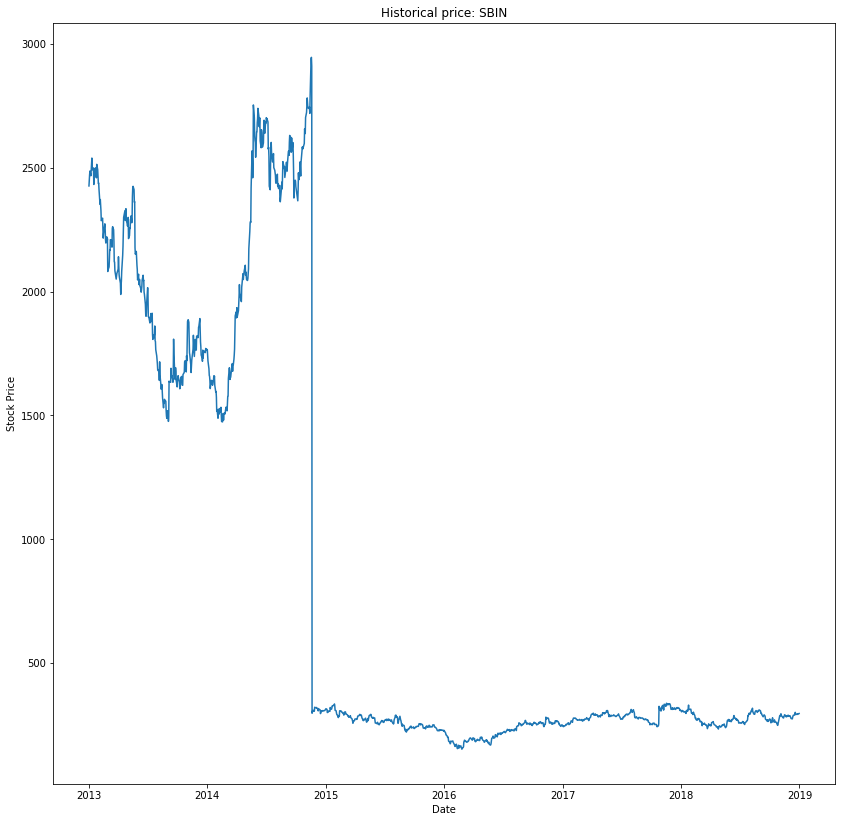

In [4]:
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title("Historical price: SBIN")
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

Filtering columns

In [6]:
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns=['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']

In [10]:
data2.head()

,Date,Open,High,Low,Close
Date,,,,,
2013-01-01,2013-01-01,2404.9,2434.05,2397.55,2426.45
2013-01-02,2013-01-02,2450.0,2464.00,2438.15,2450.55
2013-01-03,2013-01-03,2460.0,2482.40,2436.20,2471.60
2013-01-04,2013-01-04,2460.0,2492.95,2450.65,2486.70
2013-01-07,2013-01-07,2490.0,2499.00,2461.75,2467.60


Preprocess data

In [7]:
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)

In [11]:
X_train = []
y_train = []
for i in range(60, 1482):
    X_train.append(training_set_scaled[i-60:i, 0])     #from row i-60 to i-1
    y_train.append(training_set_scaled[i, 0])           #ith row
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(1422, 60)
(1422,)


In [12]:
print(X_train)

[[0.8029765  0.81907243 0.82264137 ... 0.70343868 0.70245722 0.70304609]
 [0.81907243 0.82264137 0.82264137 ... 0.70245722 0.70304609 0.67631471]
 [0.82264137 0.82264137 0.8333482  ... 0.70304609 0.67631471 0.67590428]
 ...
 [0.04247042 0.03907993 0.03975803 ... 0.0511608  0.0494834  0.04942986]
 [0.03907993 0.03975803 0.03943682 ... 0.0494834  0.04942986 0.04919788]
 [0.03975803 0.03943682 0.04223844 ... 0.04942986 0.04919788 0.05057192]]


In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)
print(X_train)

(1422, 60, 1)
[[[0.8029765 ]
  [0.81907243]
  [0.82264137]
  ...
  [0.70343868]
  [0.70245722]
  [0.70304609]]

 [[0.81907243]
  [0.82264137]
  [0.82264137]
  ...
  [0.70245722]
  [0.70304609]
  [0.67631471]]

 [[0.82264137]
  [0.82264137]
  [0.8333482 ]
  ...
  [0.70304609]
  [0.67631471]
  [0.67590428]]

 ...

 [[0.04247042]
  [0.03907993]
  [0.03975803]
  ...
  [0.0511608 ]
  [0.0494834 ]
  [0.04942986]]

 [[0.03907993]
  [0.03975803]
  [0.03943682]
  ...
  [0.0494834 ]
  [0.04942986]
  [0.04919788]]

 [[0.03975803]
  [0.03943682]
  [0.04223844]
  ...
  [0.04942986]
  [0.04919788]
  [0.05057192]]]


In [15]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [16]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=15, batch_size=32)

Epoch 1/15
1422/1422 [==============================] - 15s 10ms/step - loss: 0.0219
Epoch 2/15
1422/1422 [==============================] - 13s 9ms/step - loss: 0.0090
Epoch 3/15
1422/1422 [==============================] - 14s 10ms/step - loss: 0.0074
Epoch 4/15
1422/1422 [==============================] - 7s 5ms/step - loss: 0.0061
Epoch 5/15
1422/1422 [==============================] - 7s 5ms/step - loss: 0.0063
Epoch 6/15
1422/1422 [==============================] - 7s 5ms/step - loss: 0.0053
Epoch 7/15
1422/1422 [==============================] - 7s 5ms/step - loss: 0.0063
Epoch 8/15
1422/1422 [==============================] - 7s 5ms/step - loss: 0.0052
Epoch 9/15
1422/1422 [==============================] - 7s 5ms/step - loss: 0.0054
Epoch 10/15
1422/1422 [==============================] - 7s 5ms/step - loss: 0.0053
Epoch 11/15
1422/1422 [==============================] - 7s 5ms/step - loss: 0.0047
Epoch 12/15
1422/1422 [==============================] - 7s 5ms/step - loss: 0.0

In [20]:
#Read data from 1-1-2019 to 18-9-2019
testdataframe = gh(symbol='SBIN',start=dt.datetime(2019,1,1), end=dt.datetime(2019,9,18))
testdataframe['Date'] = testdataframe.index
#Create new dataframe and copy required data into respective columns
testdata = pd.DataFrame(columns=['Date', 'Open','High','Low','Close'])
testdata['Date']=testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Close']
testdata['Close'] = testdataframe['Close']
#Copy real price data in the test data period 'Open' 1-1-19 to 18-9-19
real_stock_price = testdata.iloc[:, 1:2]
#Merge earlier dataframe and new testdataframe
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis=0)
#Timesteps = 60
#Separate data from totaldataset 60 rows behind testdata
inputs = dataset_total[len(dataset_total)-len(testdata) - 60:].values
#Reshape to have only one column
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
#Create test data array
X_test = []
#Append sixty rows(timesteps) at a time
for i in range(60, 235):
    X_test.append(inputs[i-60:i, 0])
#Create 3D matrix
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [21]:
print(X_test.shape)

(175, 60, 1)


In [23]:
predicted_price = regressor.predict(X_test)
predicted_price = sc.inverse_transform(predicted_price)

In [35]:
real_stock_price = real_stock_price.to_numpy()

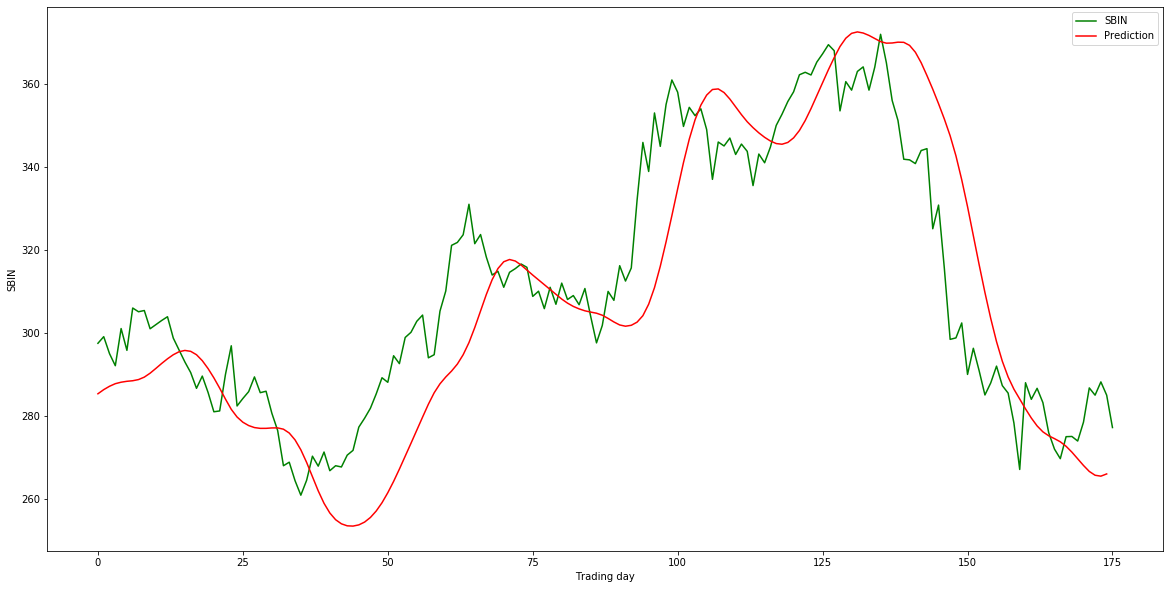

In [37]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color='green', label='SBIN')
plt.plot(predicted_price, color='red', label='Prediction')
plt.legend()
plt.xlabel("Trading day")
plt.ylabel("SBIN")
plt.show()